# K-Means Clustering: Unsupervised Learning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

## Простой пример с Iris Dataset
**Задача:** Разделить цветы ириса на группы по их характеристикам (без использования меток видов)

In [2]:
iris = load_iris()
X_iris = iris.data[:, :2]  
feature_names = iris.feature_names[:2]

df_iris = pd.DataFrame(X_iris, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


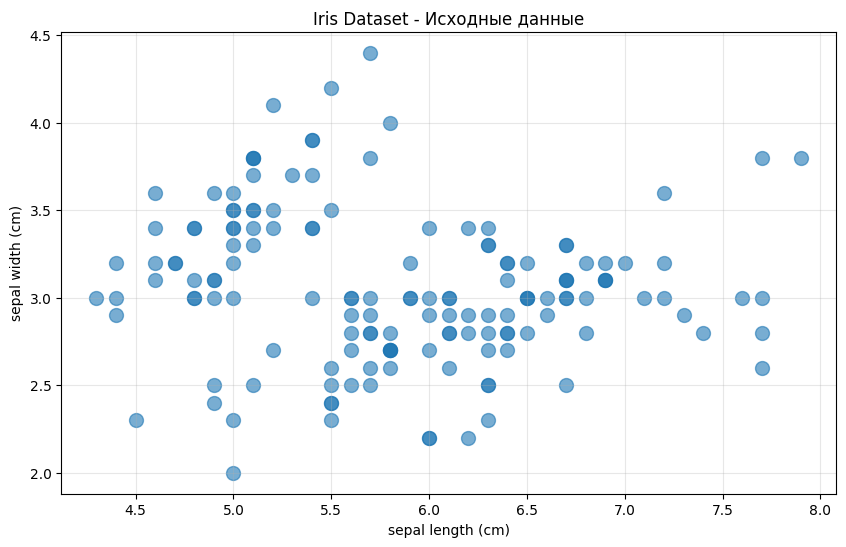

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], s=100, alpha=0.6)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset - Исходные данные')
plt.grid(True, alpha=0.3)
plt.show()

### Применяем K-Means с K=3


In [ ]:
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=1000)
clusters_iris = kmeans_iris.fit_predict(X_iris)

df_iris['Cluster'] = clusters_iris

print("Распределение точек по кластерам:")
print(df_iris['Cluster'].value_counts().sort_index())

Распределение точек по кластерам:
Cluster
0    24
1    53
2    41
3    32
Name: count, dtype: int64


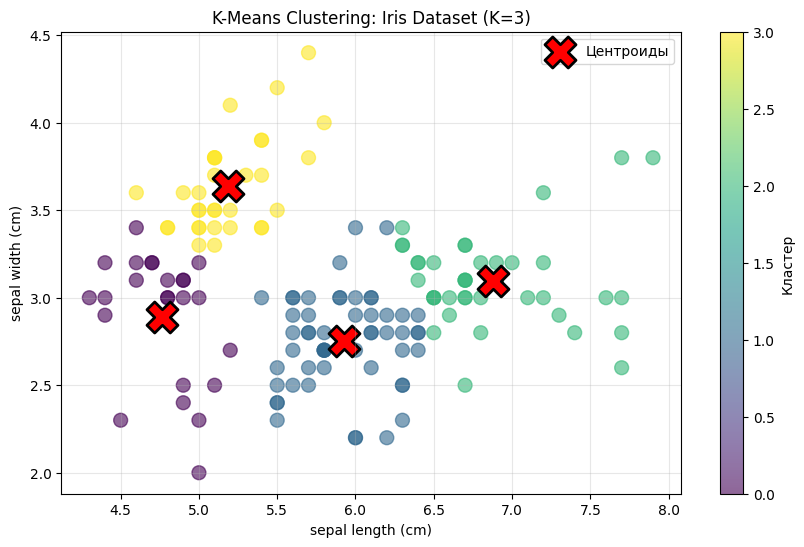


Inertia (WCSS): 27.97


In [12]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], 
                     c=clusters_iris,  s=100, alpha=0.6)

centroids = kmeans_iris.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
           s=500, c='red', marker='X', 
           edgecolors='black', linewidths=2,
           label='Центроиды')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering: Iris Dataset (K=3)')
plt.colorbar(scatter, label='Кластер')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nInertia (WCSS): {kmeans_iris.inertia_:.2f}")

### Сравнение с реальными метками

Давайте посмотрим, как кластеры соотносятся с реальными видами ирисов (это только для понимания, в реальной задаче у нас нет таких меток!)

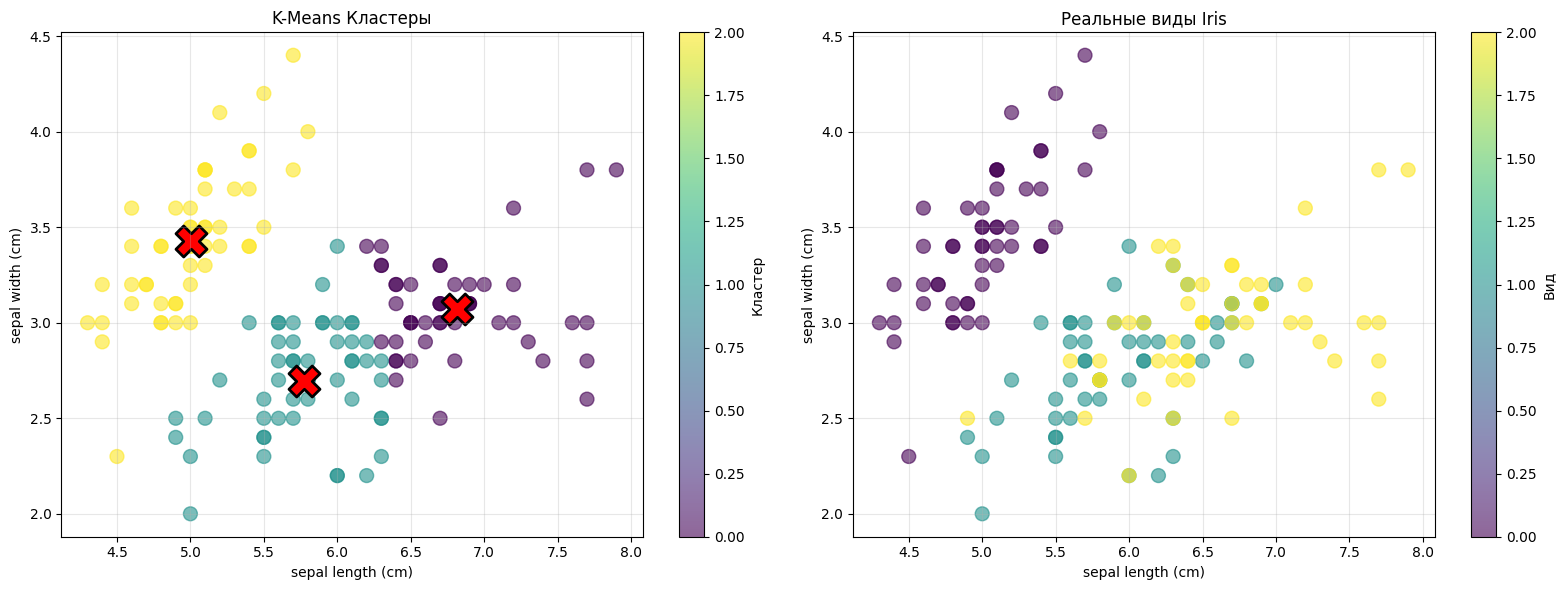

In [9]:
df_iris['True_Species'] = iris.target

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter1 = axes[0].scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], 
                          c=clusters_iris, cmap='viridis', s=100, alpha=0.6)
axes[0].scatter(centroids[:, 0], centroids[:, 1], 
               s=500, c='red', marker='X', 
               edgecolors='black', linewidths=2)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('K-Means Кластеры')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Кластер')

scatter2 = axes[1].scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], 
                          c=iris.target, cmap='viridis', s=100, alpha=0.6)
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])
axes[1].set_title('Реальные виды Iris')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Вид')

plt.tight_layout()
plt.show()

## Elbow Method - Как выбрать K?


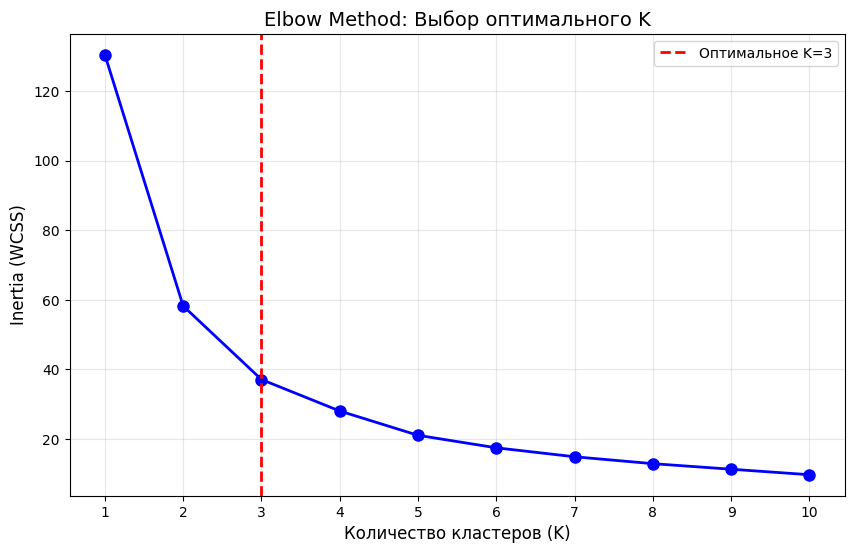

K  | Inertia
 1 |   130.48
 2 |    58.20
 3 |    37.05
 4 |    27.99
 5 |    21.00
 6 |    17.41
 7 |    14.83
 8 |    12.84
 9 |    11.24
10 |     9.66


In [10]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_iris)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method: Выбор оптимального K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

plt.axvline(x=3, color='red', linestyle='--', linewidth=2, label='Оптимальное K=3')
plt.legend()
plt.show()

print("K  | Inertia")
for k, inertia in zip(K_range, inertias):
    print(f"{k:2d} | {inertia:8.2f}")

---

## Реальная задача - Сегментация клиентов магазина

**Задача:** Интернет-магазин хочет понять своих клиентов лучше

**Проблема:** У нас есть данные о клиентах, но мы **НЕ ЗНАЕМ** какие группы клиентов у нас есть и как их сегментировать для маркетинга

**Цель:** Найти скрытые сегменты клиентов на основе их поведения и характеристик

**Применение:** 
- Персонализированные рекомендации для каждого сегмента
- Таргетированная реклама
- Разные программы лояльности
- Понимание целевой аудитории

### Загрузка данных о клиентах

**Признаки:**
- **CustomerID** (ID клиента)
- **Age** (Возраст): 18-70 лет
- **Annual_Income** (Годовой доход): 150,000₸ - 3,000,000₸
- **Spending_Score** (Оценка трат): 1-100 (насколько активно клиент тратит)
- **Purchase_Frequency** (Частота покупок): 1-50 покупок в год
- **Avg_Order_Value** (Средний чек): 5,000₸ - 100,000₸

In [13]:
df = pd.read_csv('datasets/customer_data.csv')
print(f"Размер датасета: {df.shape}")
df.head(10)

Размер датасета: (500, 6)


,CustomerID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Avg_Order_Value
0,C0001,27,370039,21,7,14270
1,C0002,24,377715,24,10,9233
2,C0003,28,295598,37,5,14608
3,C0004,32,368580,36,9,16066
4,C0005,23,373445,29,6,13240
5,C0006,23,292851,31,5,17630
6,C0007,32,499261,42,7,9678
7,C0008,28,387906,24,4,8266
8,C0009,22,254695,35,6,6663
9,C0010,27,402524,27,4,16488


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          500 non-null    object
 1   Age                 500 non-null    int64 
 2   Annual_Income       500 non-null    int64 
 3   Spending_Score      500 non-null    int64 
 4   Purchase_Frequency  500 non-null    int64 
 5   Avg_Order_Value     500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [15]:
df.describe()

,Age,Annual_Income,Spending_Score,Purchase_Frequency,Avg_Order_Value
count,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,39.962000,8.538791e+05,49.034000,17.210000,32790.042000
std,13.742717,6.330046e+05,22.045881,10.904481,22918.406278
min,18.000000,1.500000e+05,10.000000,1.000000,5000.000000
25%,29.000000,3.911770e+05,33.000000,9.000000,14121.000000
50%,40.000000,6.546310e+05,43.000000,15.000000,26727.500000
75%,50.000000,1.025032e+06,64.000000,23.000000,45222.750000
max,70.000000,3.000000e+06,100.000000,50.000000,100000.000000


### Exploratory Data Analysis (EDA)

Изучим наших клиентов перед кластеризацией.

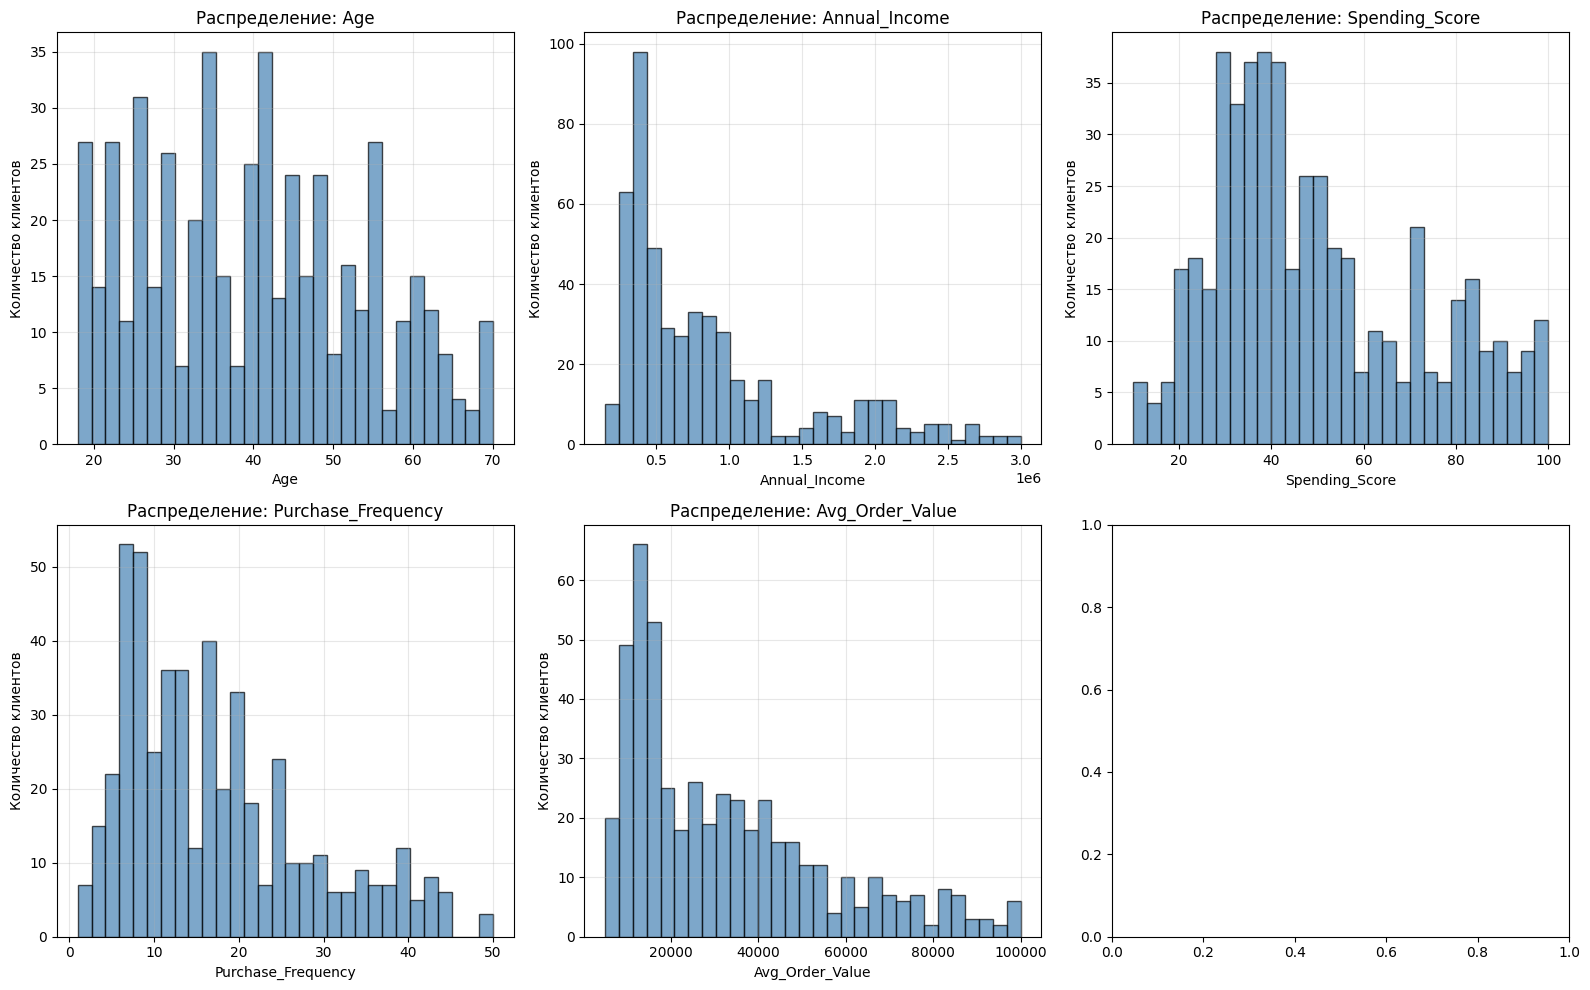

In [16]:
features = ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Avg_Order_Value']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Распределение: {feature}', fontsize=12)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Количество клиентов')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

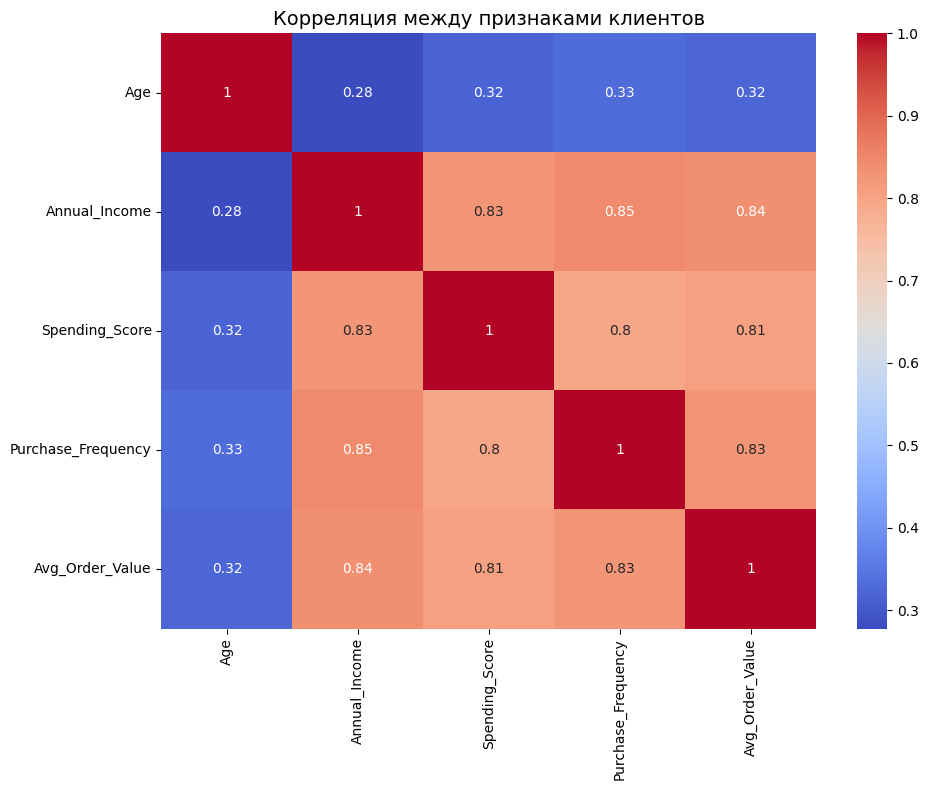

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm')
plt.title('Корреляция между признаками клиентов', fontsize=14)
plt.tight_layout()
plt.show()

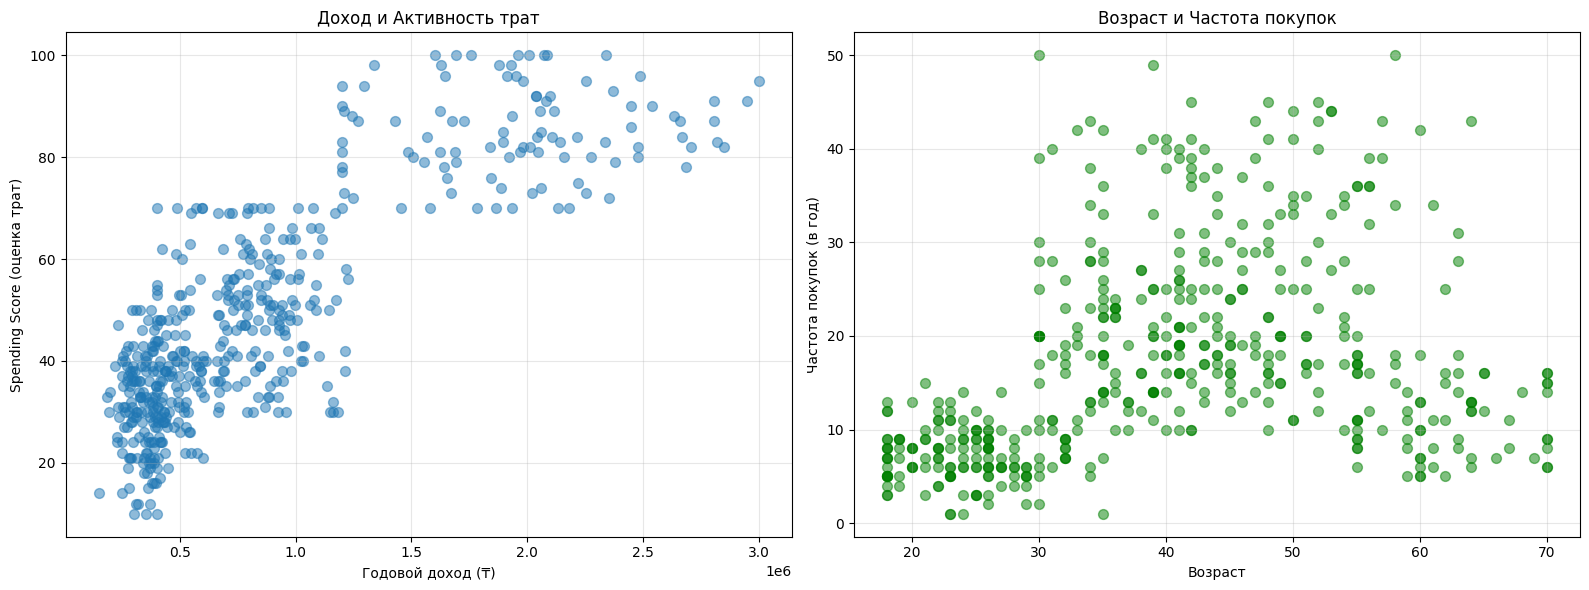

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['Annual_Income'], df['Spending_Score'], alpha=0.5, s=50)
axes[0].set_xlabel('Годовой доход (₸)')
axes[0].set_ylabel('Spending Score (оценка трат)')
axes[0].set_title('Доход и Активность трат')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df['Age'], df['Purchase_Frequency'], alpha=0.5, s=50, color='green')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Частота покупок (в год)')
axes[1].set_title('Возраст и Частота покупок')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Feature Scaling

In [19]:
print(df[features].describe().loc[['min', 'max']])

      Age  Annual_Income  Spending_Score  Purchase_Frequency  Avg_Order_Value
min  18.0       150000.0            10.0                 1.0           5000.0
max  70.0      3000000.0           100.0                50.0         100000.0


In [20]:
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=features)

print(df_scaled.describe().loc[['mean', 'std', 'min', 'max']].round(2))

       Age  Annual_Income  Spending_Score  Purchase_Frequency  Avg_Order_Value
mean -0.00          -0.00            0.00               -0.00            -0.00
std   1.00           1.00            1.00                1.00             1.00
min  -1.60          -1.11           -1.77               -1.49            -1.21
max   2.19           3.39            2.31                3.01             2.94


### Elbow Method: Выбор оптимального K

Мы **не знаем** сколько сегментов клиентов у нас есть. Используем Elbow Method!

K=2: Inertia=1120.34
K=3: Inertia=657.14
K=4: Inertia=450.36
K=5: Inertia=408.53
K=6: Inertia=374.28
K=7: Inertia=350.89
K=8: Inertia=332.34
K=9: Inertia=312.13
K=10: Inertia=298.13


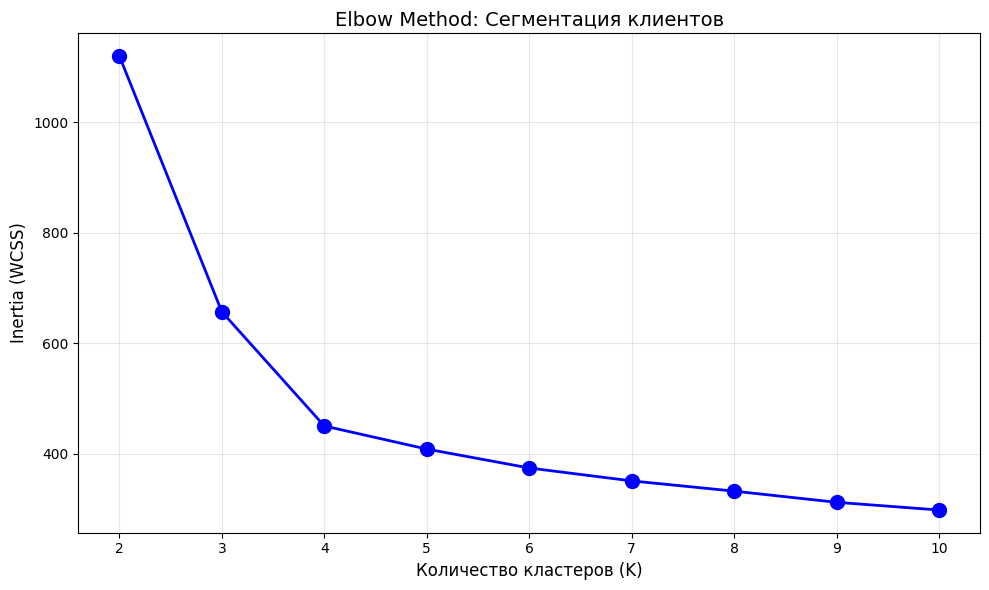

In [21]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Количество кластеров (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method: Сегментация клиентов', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

plt.tight_layout()
plt.show()

In [23]:
optimal_k = 4  

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=100)
clusters = kmeans_final.fit_predict(X_scaled)

df['Cluster'] = clusters

print(df['Cluster'].value_counts().sort_index())

Cluster
0    176
1     99
2    152
3     73
Name: count, dtype: int64


### Профилирование кластеров

In [24]:
cluster_profiles = df.groupby('Cluster')[features].mean()

print(cluster_profiles.round(0))

          Age  Annual_Income  Spending_Score  Purchase_Frequency  \
Cluster                                                            
0        41.0       825940.0            50.0                18.0   
1        46.0      1962117.0            85.0                35.0   
2        24.0       359568.0            30.0                 7.0   
3        61.0       447536.0            36.0                11.0   

         Avg_Order_Value  
Cluster                   
0                36103.0  
1                69359.0  
2                12000.0  
3                18500.0  


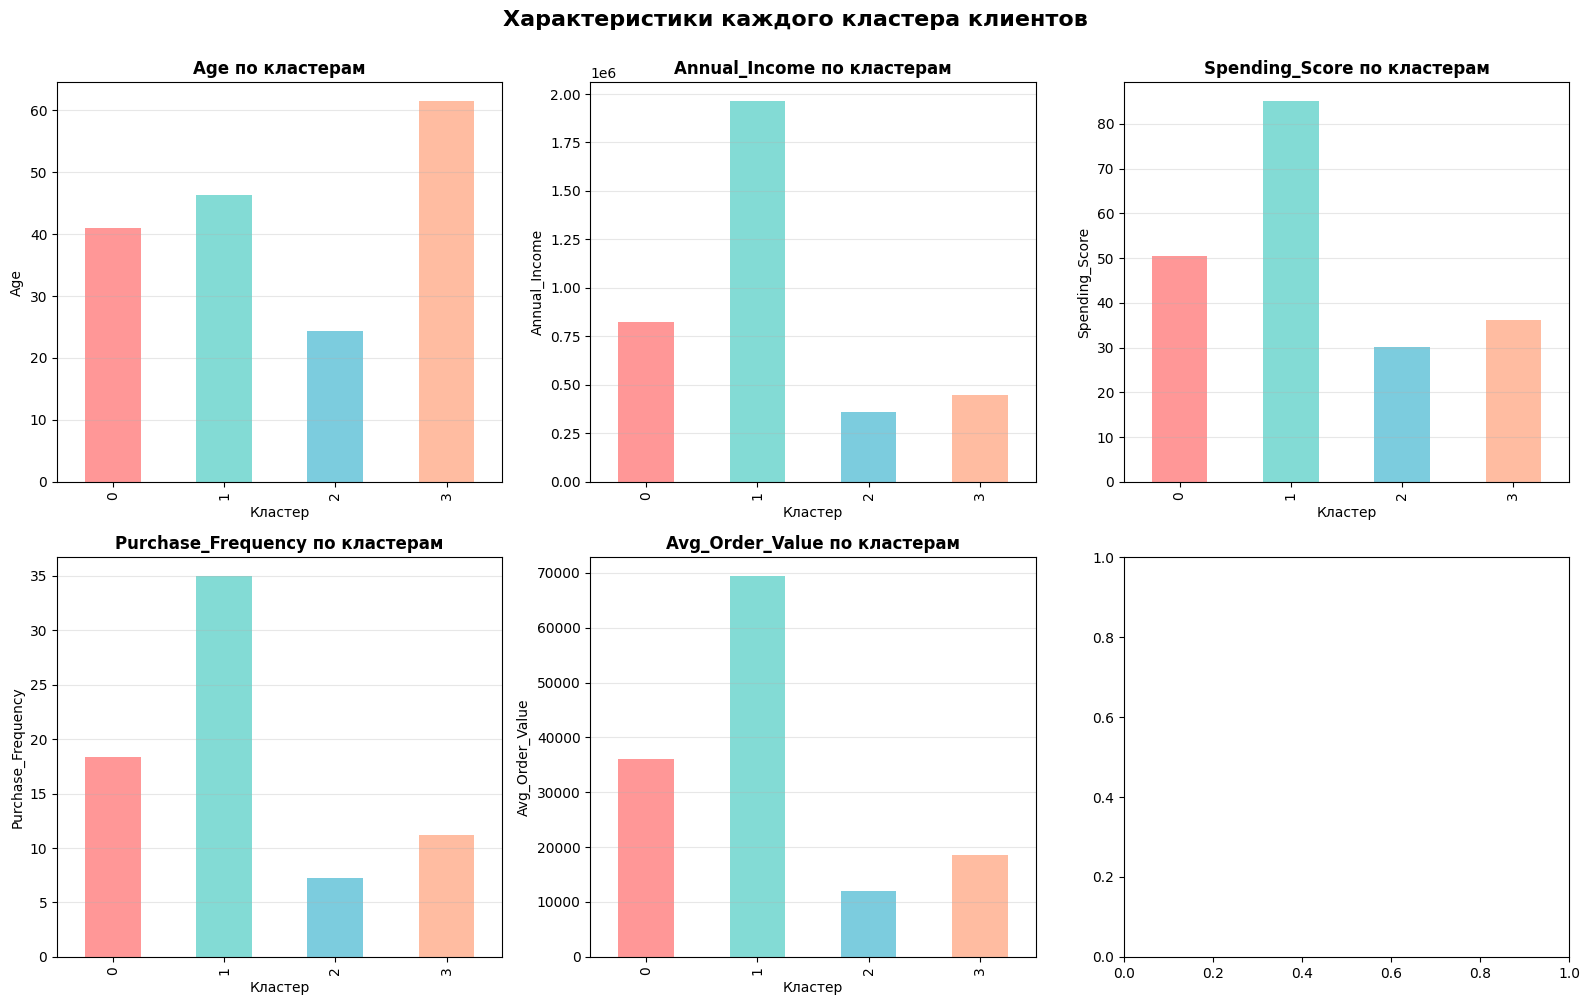

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, feature in enumerate(features):
    cluster_profiles[feature].plot(kind='bar', ax=axes[idx], color=colors, alpha=0.7)
    axes[idx].set_title(f'{feature} по кластерам', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Кластер')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Характеристики каждого кластера клиентов', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [26]:
cluster_names = {
    0: "Средний класс",
    1: "VIP клиенты",
    2: "Молодые экономные",
    3: "Пенсионеры"
}

df['Cluster_Name'] = df['Cluster'].map(cluster_names)

### Визуализация кластеров (2D)

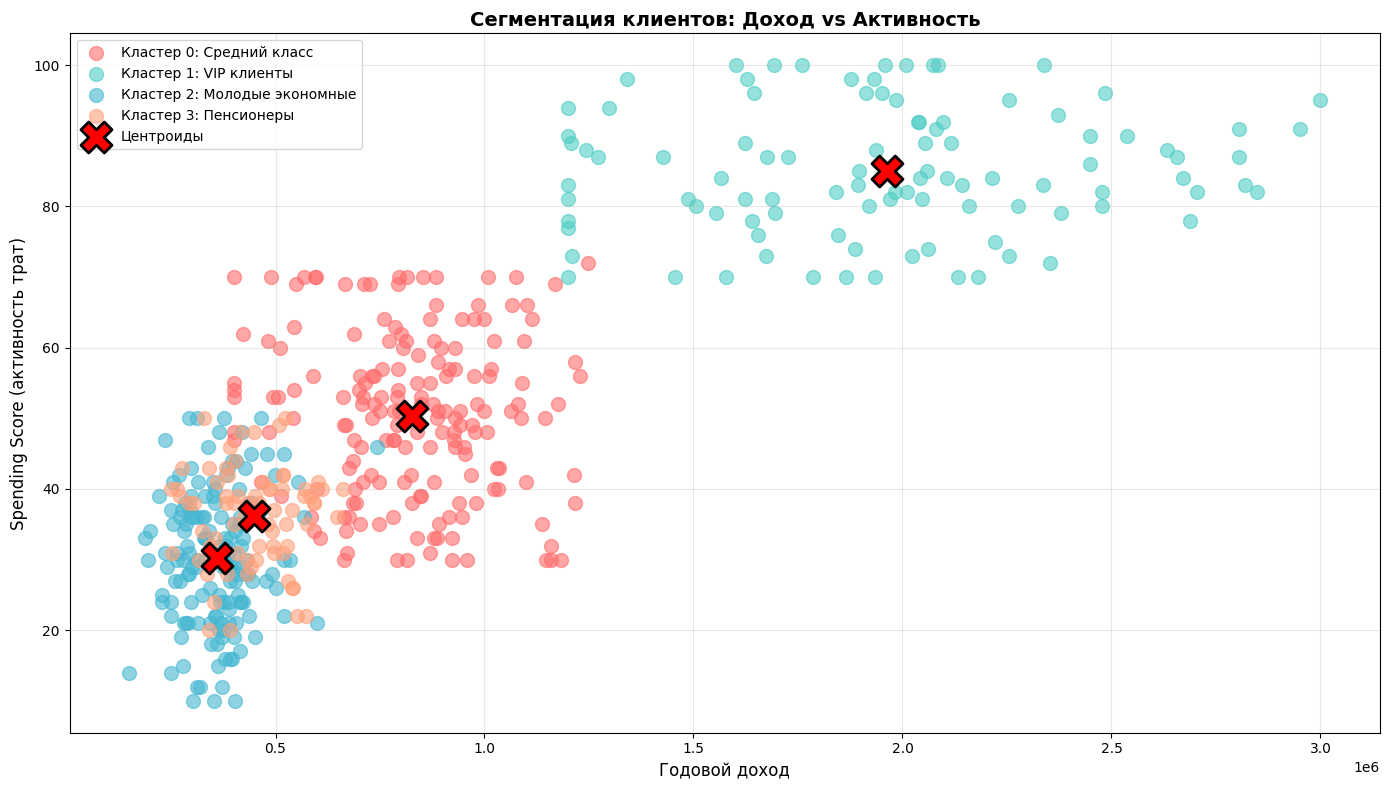

In [27]:
plt.figure(figsize=(14, 8))

colors_map = {0: '#FF6B6B', 1: '#4ECDC4', 2: '#45B7D1', 3: '#FFA07A'}

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual_Income'], 
               cluster_data['Spending_Score'],
               label=f'Кластер {cluster}: {cluster_names[cluster]}',
               s=100, alpha=0.6, color=colors_map[cluster])

centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_original[:, 1],  
           centroids_original[:, 2],   
           s=500, c='red', marker='X', 
           edgecolors='black', linewidths=2,
           label='Центроиды', zorder=5)

plt.xlabel('Годовой доход', fontsize=12)
plt.ylabel('Spending Score (активность трат)', fontsize=12)
plt.title('Сегментация клиентов: Доход vs Активность', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

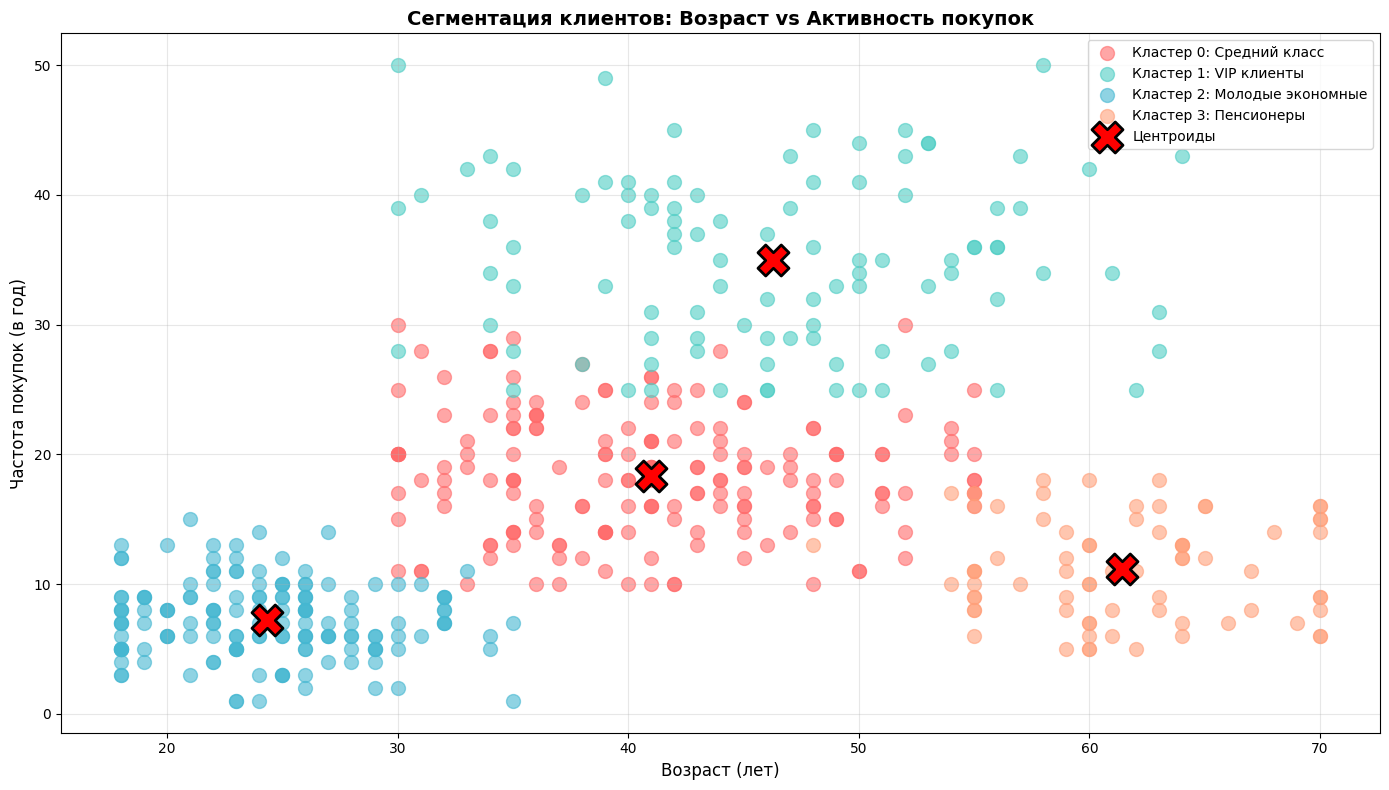

In [28]:
plt.figure(figsize=(14, 8))

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], 
               cluster_data['Purchase_Frequency'],
               label=f'Кластер {cluster}: {cluster_names[cluster]}',
               s=100, alpha=0.6, color=colors_map[cluster])

plt.scatter(centroids_original[:, 0],  
           centroids_original[:, 3],   
           s=500, c='red', marker='X', 
           edgecolors='black', linewidths=2,
           label='Центроиды', zorder=5)

plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Частота покупок (в год)', fontsize=12)
plt.title('Сегментация клиентов: Возраст vs Активность покупок', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
result_df = df[['CustomerID', 'Age', 'Annual_Income', 'Spending_Score', 
                'Purchase_Frequency', 'Avg_Order_Value', 'Cluster', 'Cluster_Name']].sort_values('Cluster')

print(result_df.head(20))

    CustomerID  Age  Annual_Income  Spending_Score  Purchase_Frequency  \
282      C0283   36        1029753              43                  16   
287      C0288   37        1032165              40                  12   
265      C0266   36         976731              48                  14   
264      C0265   35         765474              47                  22   
263      C0264   54         792298              54                  21   
262      C0263   52        1015736              57                  23   
261      C0262   30         708223              53                  20   
260      C0261   41        1136785              35                  12   
259      C0260   45        1009419              70                  14   
258      C0259   35         844890              39                  24   
257      C0258   43         507125              53                  13   
255      C0256   35        1114797              64                  18   
254      C0255   51         703362    

---

## Домашнее задание

**Задача:** Провести кластеризацию на своём наборе данных